# Classification Tree in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Simple Decision Tree

We will start by setting up a simple Classification Problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total**    

Extract the variables and the associated data as a Pandas `DataFrame`.

In [5]:
legnd = pd.DataFrame(pkmndata['Legendary'])  # Response
total = pd.DataFrame(pkmndata['Total'])      # Predictor

Set up the classification problem with Train and Test datasets.   
Train Set with 600 samples and Test Set with 200 samples.

In [6]:
# Train Set : 600 samples
total_train = pd.DataFrame(total[:600])
legnd_train = pd.DataFrame(legnd[:600])

# Test Set : 200 samples
total_test = pd.DataFrame(total[-200:])
legnd_test = pd.DataFrame(legnd[-200:])

# Check the sample sizes
print("Train Set :", legnd_train.shape, total_train.shape)
print("Test Set  :", legnd_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [7]:
type(legnd_train["Legendary"])

pandas.core.series.Series

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [8]:
# Summary Statistics for Legendary Train
legnd_train["Legendary"].value_counts()

False    557
True      43
Name: Legendary, dtype: int64

In [9]:
# Summary Statistics for Total Train
total_train.describe()

,Total
count,600.000000
mean,432.715000
std,122.365283
min,180.000000
25%,325.000000
50%,440.000000
75%,515.000000
max,780.000000


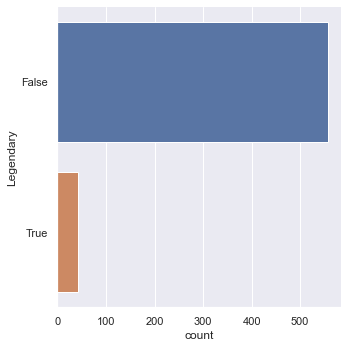

In [10]:
# Count Plot for Legendary Train
sb.catplot(y = "Legendary", data = legnd_train, kind = "count")

<AxesSubplot:>

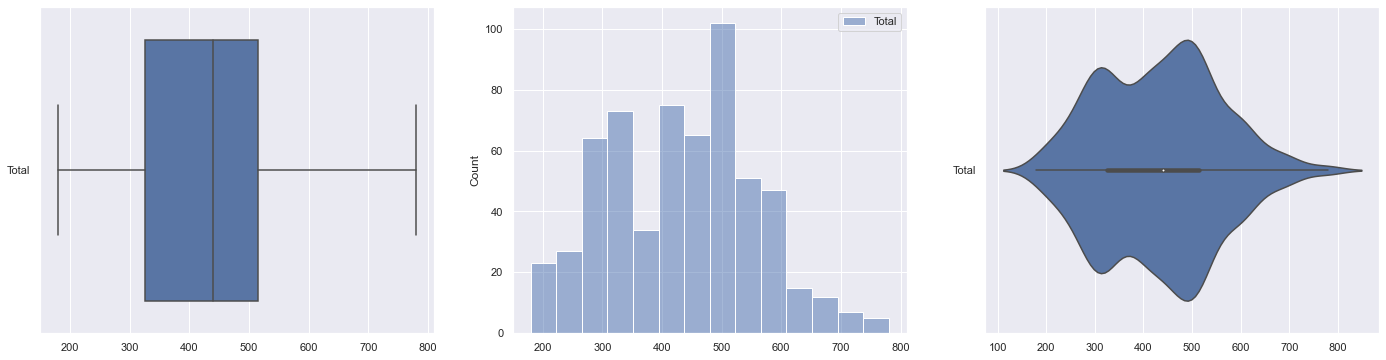

In [11]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = total_train, orient = "h", ax = axes[0])
sb.histplot(data = total_train, ax = axes[1])
sb.violinplot(data = total_train, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Total', ylabel='Legendary'>

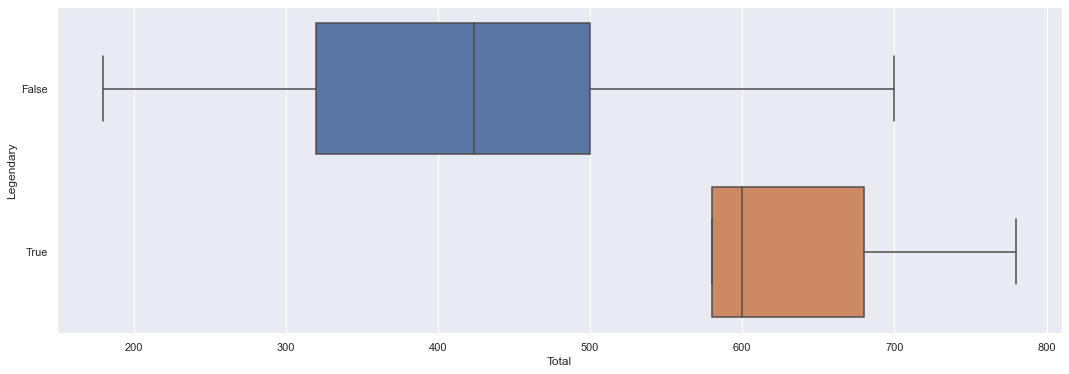

In [12]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([total_train, legnd_train], axis = 1).reindex(total_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Total", y = "Legendary", data = trainDF, orient = "h")

<AxesSubplot:xlabel='Total', ylabel='Legendary'>

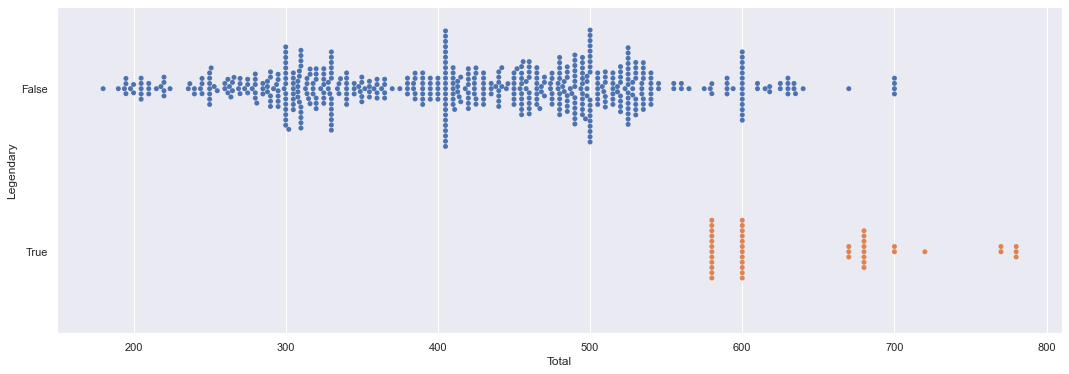

In [13]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([total_train, legnd_train], axis = 1).reindex(total_train.index)

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "Total", y = "Legendary", data = trainDF, orient = "h")

#### Decision Tree in Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `DecisionTreeClassifier` model from `sklearn.tree`.

In [14]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `total_train` as *Predictor* and `legnd_train` as *Response*.

In [15]:
# Train the Decision Tree Classifier model
dectree.fit(total_train, legnd_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.133\nsamples = 600\nvalue = [557, 43]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 516\nvalue = [516, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 655.0\ngini = 0.5\nsamples = 84\nvalue = [41, 43]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.48\nsamples = 60\nvalue = [36, 24]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.33\nsamples = 24\nvalue = [5, 19]\nclass = Legendary')]

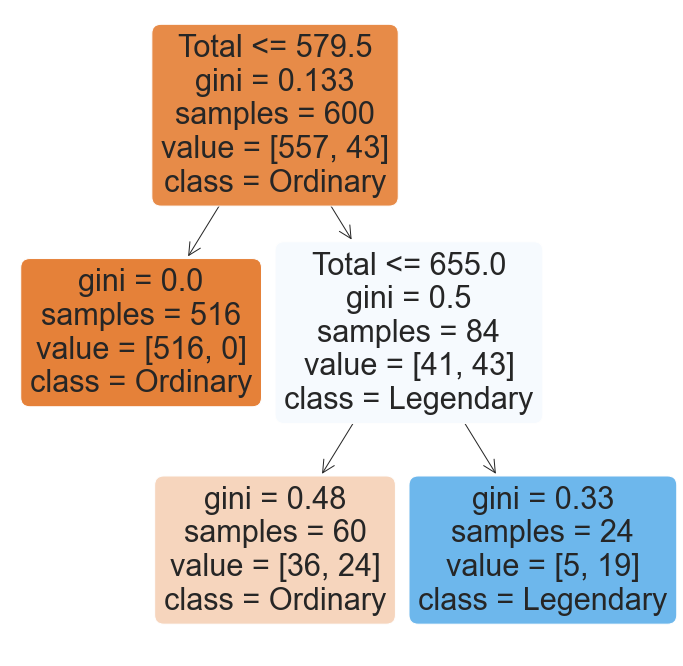

In [16]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["Ordinary","Legendary"])

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.9516666666666667


<AxesSubplot:>

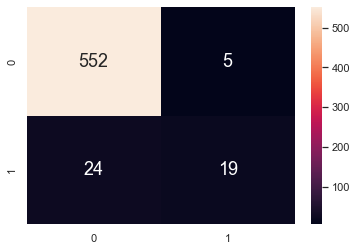

In [17]:
# Predict Legendary corresponding to Total Train
legnd_train_pred = dectree.predict(total_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_train, legnd_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Check how good the predictions are on the Test Set.    
Metrics : Classification Accuracy and Confusion Matrix.

Classification Accuracy 	: 0.935


<AxesSubplot:>

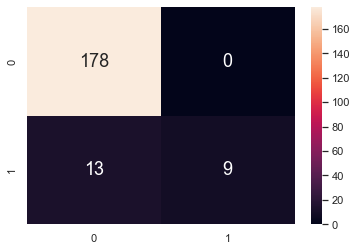

In [18]:
# Predict Legendary corresponding to Total Test
legnd_test_pred = dectree.predict(total_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(total_test, legnd_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(legnd_test, legnd_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Classification Tree with Random Train-Test Split

Split the Train and Test sets randomly, and perform Classification.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9483333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.945



<AxesSubplot:>

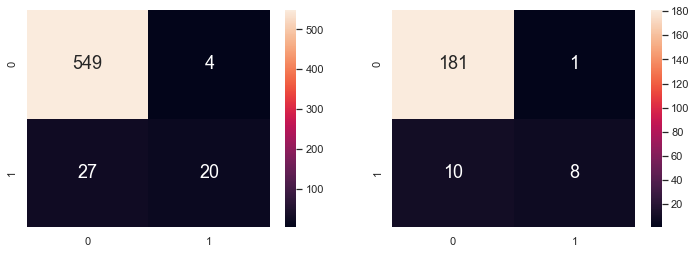

In [19]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['Legendary'])   # Response
total = pd.DataFrame(pkmndata['Total'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.144\nsamples = 600\nvalue = [553, 47]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 518\nvalue = [518, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 647.5\ngini = 0.489\nsamples = 82\nvalue = [35, 47]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.498\nsamples = 58\nvalue = [31, 27]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.278\nsamples = 24\nvalue = [4, 20]\nclass = Legendary')]

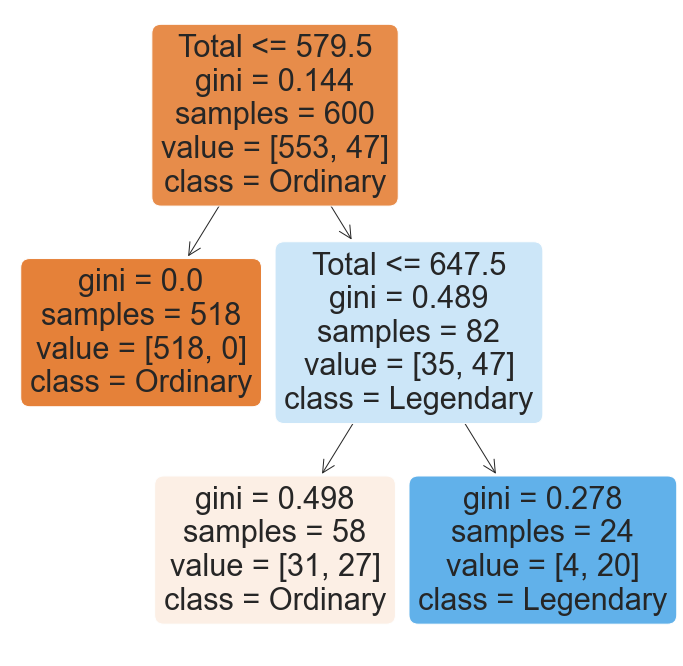

In [20]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["Ordinary","Legendary"])

---

## Multi-Variate Classification Tree

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [21]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Legendary"])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense"]])

Set up the classification problem with Train and Test datasets.   

In [22]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (600, 1) (600, 4)
Test Set  : (200, 1) (200, 4)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [23]:
# Summary Statistics for Response
y_train["Legendary"].value_counts()

False    554
True      46
Name: Legendary, dtype: int64

In [27]:
# Summary Statistics for Predictors
X_train.describe()

,Total,HP,Attack,Defense
count,600.000000,600.000000,600.000000,600.00000
mean,434.158333,69.246667,78.871667,73.66000
std,118.749255,24.904475,31.585777,31.07755
min,180.000000,1.000000,5.000000,5.00000
25%,330.000000,50.000000,55.000000,50.00000
50%,449.000000,65.000000,75.000000,70.00000
75%,510.000000,80.000000,100.000000,90.00000
max,780.000000,255.000000,190.000000,230.00000


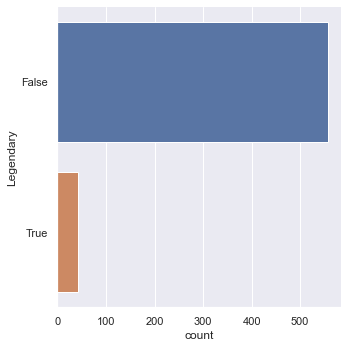

In [31]:
# Draw the distribution of Response
sb.catplot(y = "Legendary", data = legnd_train, kind = "count")

KeyError: 0

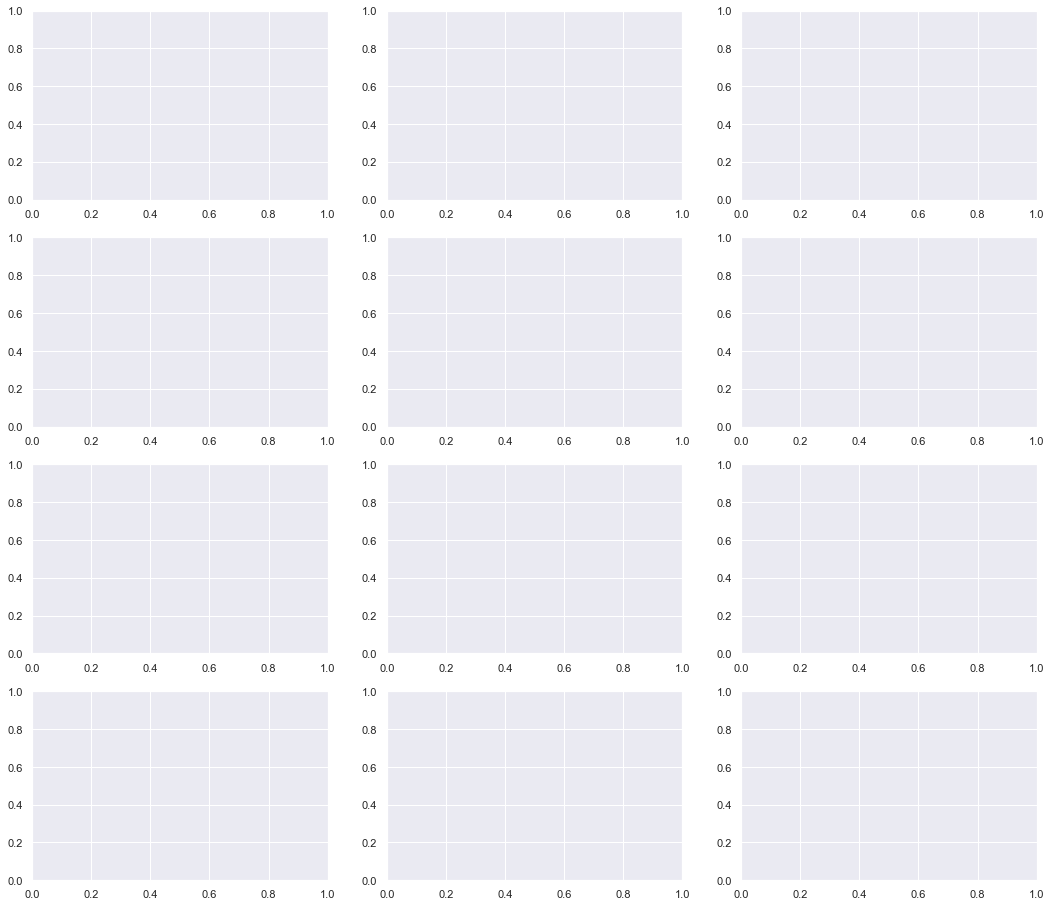

In [32]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


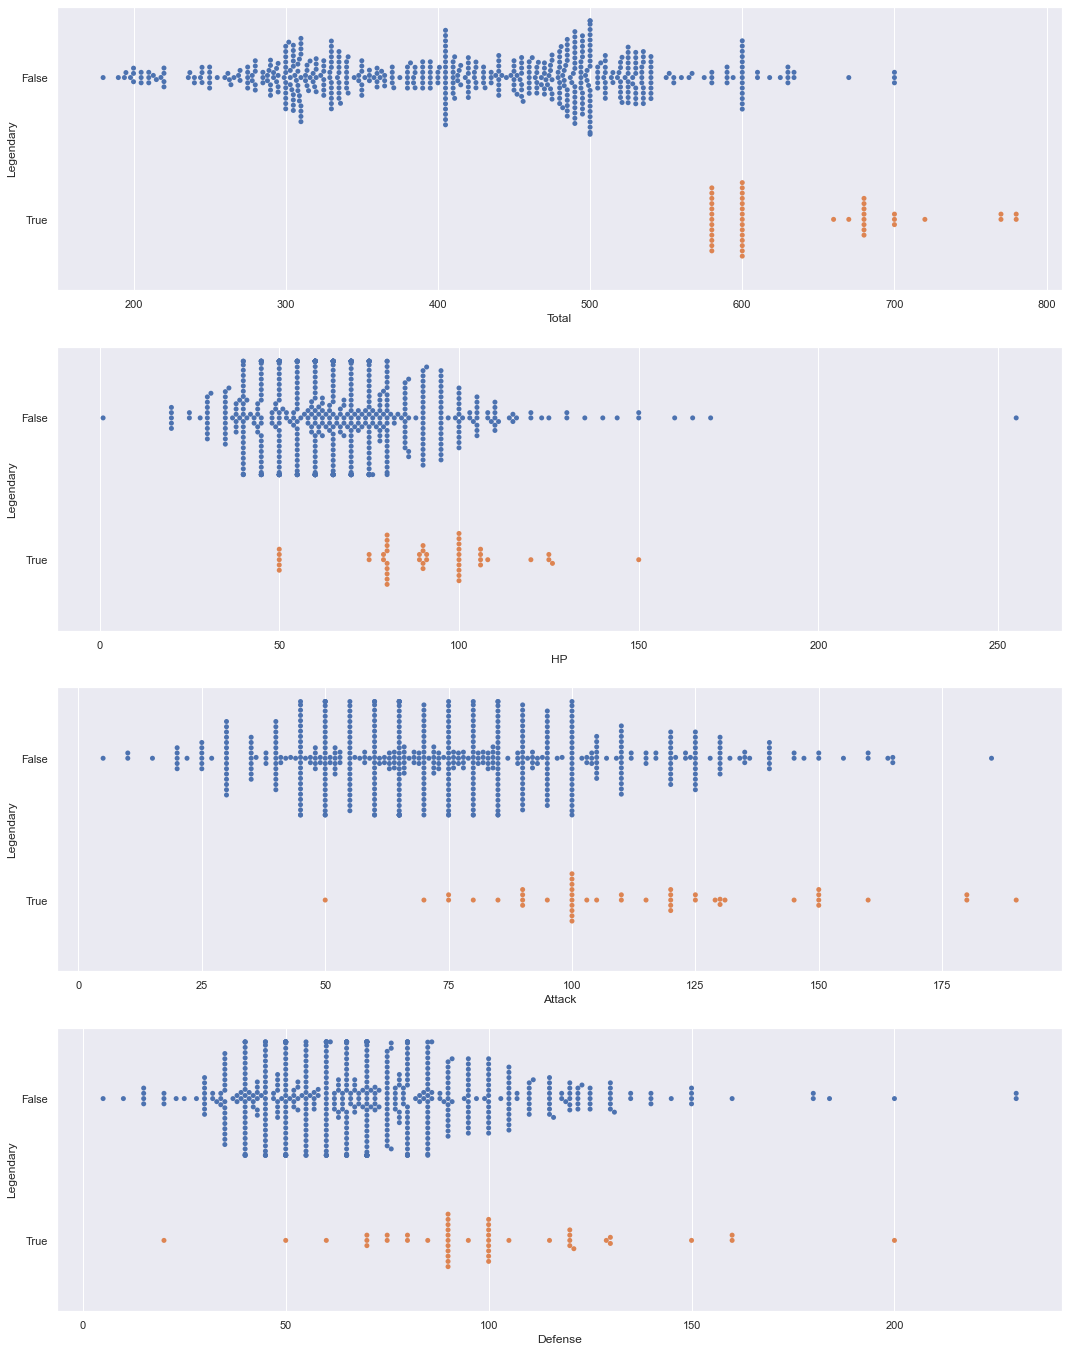

In [34]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "Legendary", data = trainDF, orient = "h", ax = axes[count])
    count += 1

#### Classification Tree in Scikit-Learn

In [35]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'Total <= 577.5\ngini = 0.142\nsamples = 600\nvalue = [554, 46]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 518\nvalue = [518, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 647.0\ngini = 0.493\nsamples = 82\nvalue = [36, 46]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.498\nsamples = 60\nvalue = [32, 28]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.298\nsamples = 22\nvalue = [4, 18]\nclass = Legendary')]

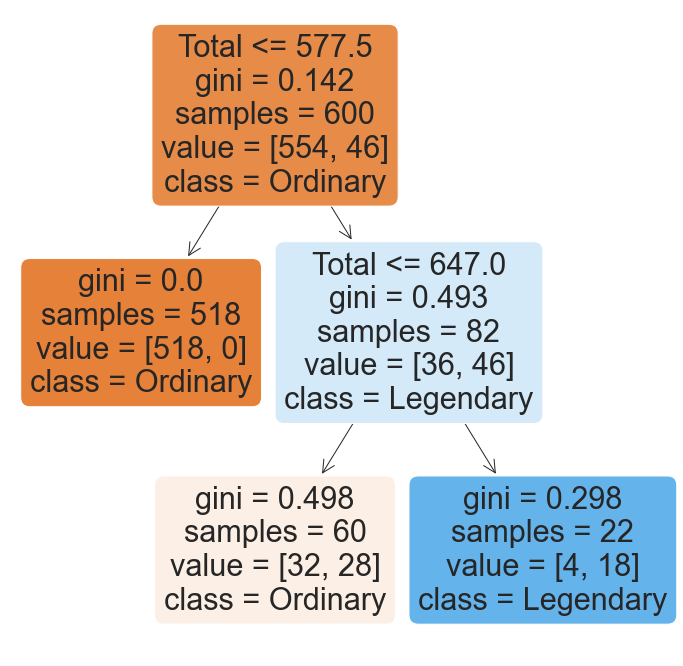

In [36]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

#### Goodness of Fit of the Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9466666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95



<AxesSubplot:>

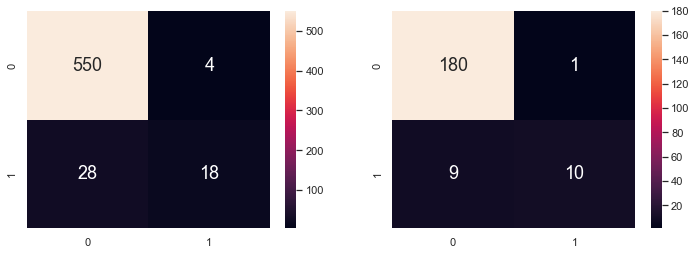

In [37]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---

## Multi-Variate Classification Tree

Let us set up another Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9516666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.935



<AxesSubplot:>

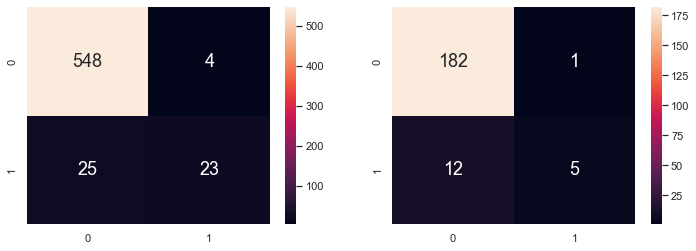

In [38]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(pkmndata['Legendary'])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.4, 0.8333333333333334, 'Total <= 579.5\ngini = 0.147\nsamples = 600\nvalue = [552, 48]\nclass = Ordinary'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 516\nvalue = [516, 0]\nclass = Ordinary'),
 Text(0.6, 0.5, 'Total <= 647.5\ngini = 0.49\nsamples = 84\nvalue = [36, 48]\nclass = Legendary'),
 Text(0.4, 0.16666666666666666, 'gini = 0.492\nsamples = 57\nvalue = [32, 25]\nclass = Ordinary'),
 Text(0.8, 0.16666666666666666, 'gini = 0.252\nsamples = 27\nvalue = [4, 23]\nclass = Legendary')]

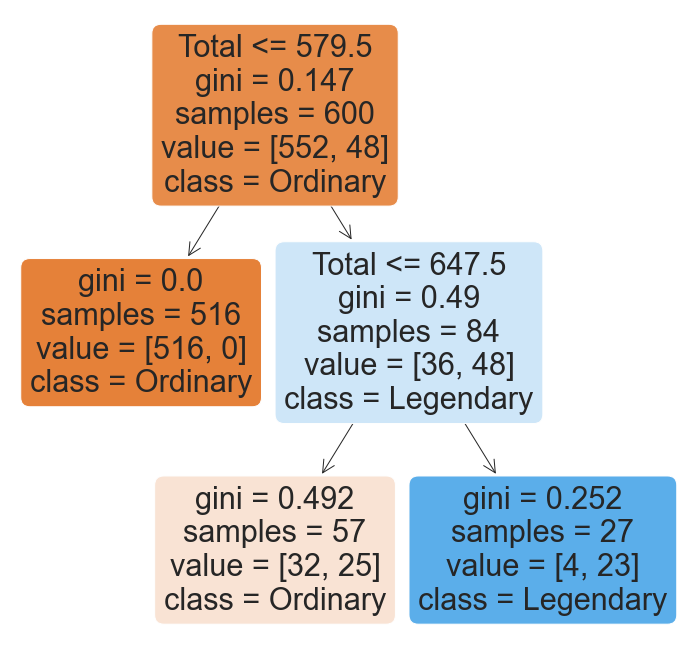

In [39]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

---

## Prediction using a Classification Tree

Once we have trained a Multi-Variate Classification Tree, we may use it to predict **Legendary** for any particular Pokemon.   

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9716666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.955



<AxesSubplot:>

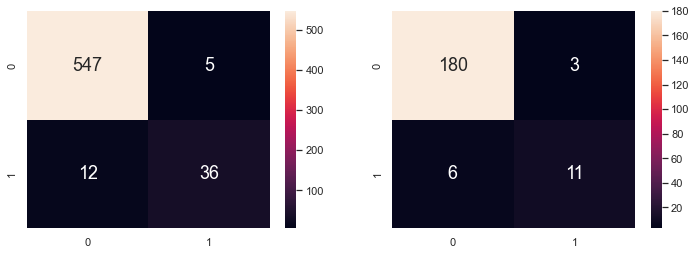

In [40]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Legendary'])
X = pd.DataFrame(pkmndata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.375, 0.875, 'Total <= 579.5\ngini = 0.147\nsamples = 600\nvalue = [552, 48]\nclass = Ordinary'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 520\nvalue = [520, 0]\nclass = Ordinary'),
 Text(0.5, 0.625, 'Total <= 650.0\ngini = 0.48\nsamples = 80\nvalue = [32, 48]\nclass = Legendary'),
 Text(0.25, 0.375, 'Total <= 585.0\ngini = 0.5\nsamples = 57\nvalue = [29, 28]\nclass = Ordinary'),
 Text(0.125, 0.125, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]\nclass = Legendary'),
 Text(0.375, 0.125, 'gini = 0.432\nsamples = 38\nvalue = [26, 12]\nclass = Ordinary'),
 Text(0.75, 0.375, 'Sp. Def <= 77.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = Legendary'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Ordinary'),
 Text(0.875, 0.125, 'gini = 0.165\nsamples = 22\nvalue = [2, 20]\nclass = Legendary')]

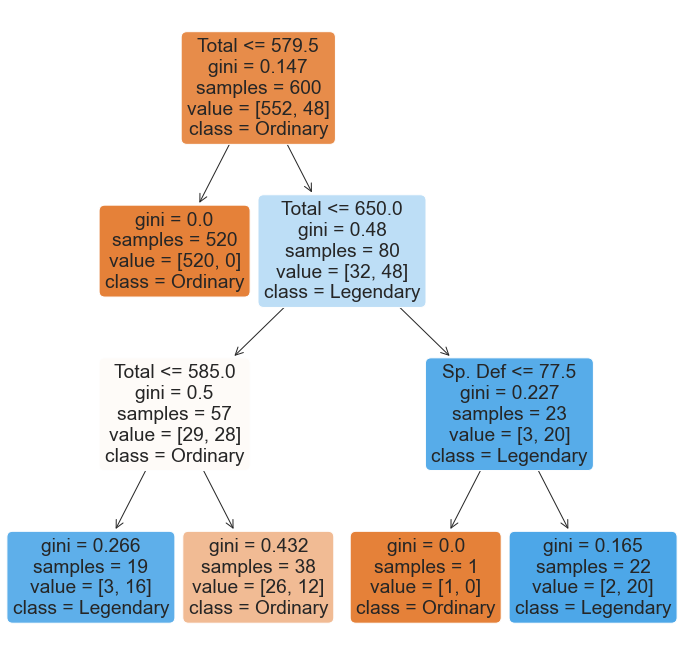

In [41]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

#### Prediction of Legendary

Let's predict the value of **Legendary** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [42]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [43]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array([False,  True,  True])

In [44]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredLegend"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Legendary"]], y_pred], axis = 1)

pkmndata_acc

,Name,Legendary,PredLegend
15,Butterfree,False,False
162,Mewtwo,True,True
545,GiratinaOrigin Forme,True,True


#### Prediction of Class Probabilities

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [45]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
y_prob

array([[1.        , 0.        ],
       [0.09090909, 0.90909091],
       [0.09090909, 0.90909091]])

In [46]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProbLegend"], index = pkmndata_pred.index)
pkmndata_conf = pd.concat([pkmndata_acc, y_prob], axis = 1)

pkmndata_conf

,Name,Legendary,PredLegend,ProbLegend
15,Butterfree,False,False,0.000000
162,Mewtwo,True,True,0.909091
545,GiratinaOrigin Forme,True,True,0.909091


[Text(0.375, 0.875, 'Total <= 579.5\ngini = 0.147\nsamples = 600\nvalue = [552, 48]\nclass = Ordinary'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 520\nvalue = [520, 0]\nclass = Ordinary'),
 Text(0.5, 0.625, 'Total <= 650.0\ngini = 0.48\nsamples = 80\nvalue = [32, 48]\nclass = Legendary'),
 Text(0.25, 0.375, 'Total <= 585.0\ngini = 0.5\nsamples = 57\nvalue = [29, 28]\nclass = Ordinary'),
 Text(0.125, 0.125, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]\nclass = Legendary'),
 Text(0.375, 0.125, 'gini = 0.432\nsamples = 38\nvalue = [26, 12]\nclass = Ordinary'),
 Text(0.75, 0.375, 'Sp. Def <= 77.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = Legendary'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Ordinary'),
 Text(0.875, 0.125, 'gini = 0.165\nsamples = 22\nvalue = [2, 20]\nclass = Legendary')]

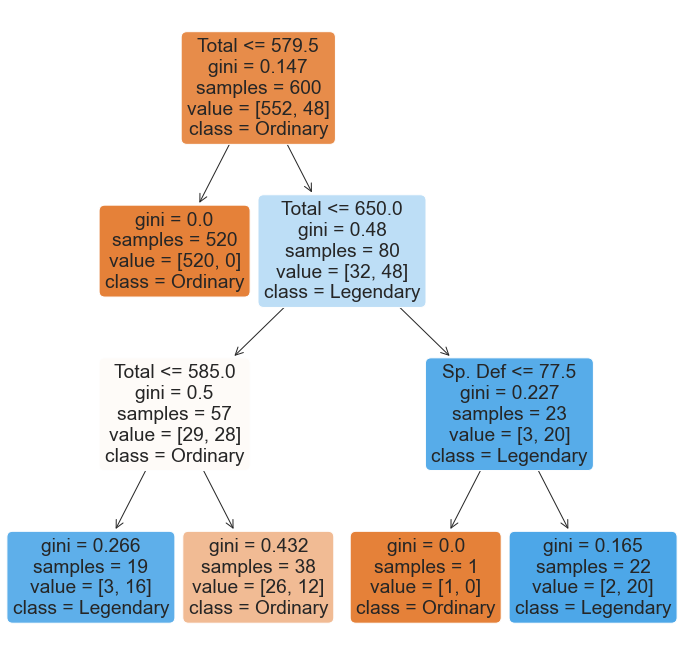

In [47]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Ordinary","Legendary"])

---

## Multi-Class Classification Tree

Let us set up a Multi-Class Classification problem.   

Response Variable : **Type 1**     
Predictor Feature : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

In [48]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

y = pd.DataFrame(pkmndata['Type 1'].astype('category'))
X = pd.DataFrame(pkmndata[predictors]) 

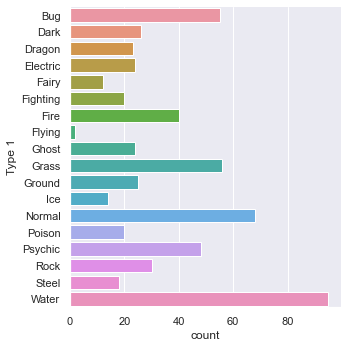

In [49]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Type 1", data = y_train, kind = "count")

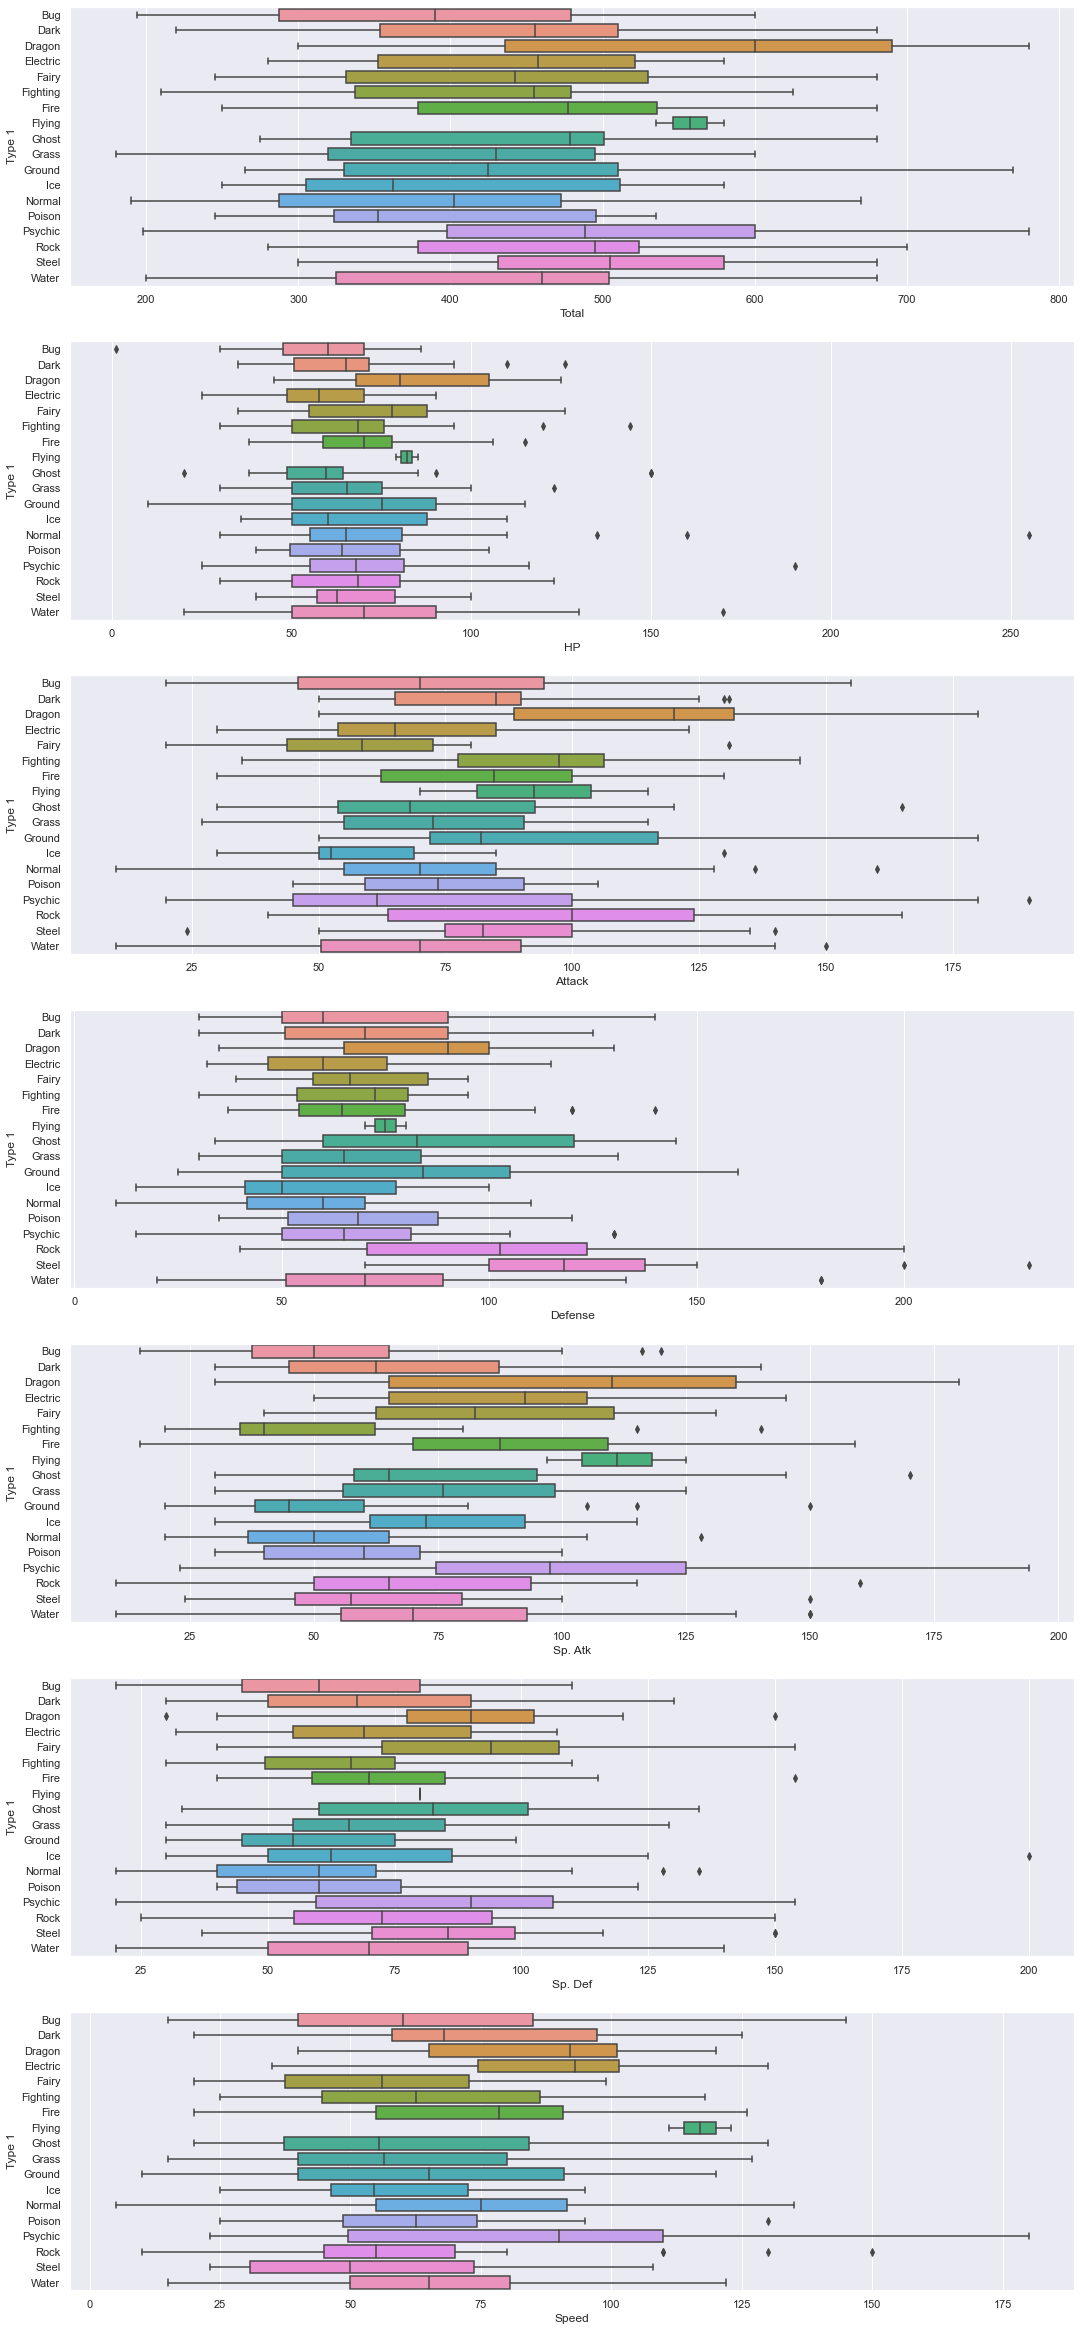

In [50]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Type 1", data = trainDF, orient = "h", ax = axes[count])
    count += 1

#### Training the Decision Tree

In [51]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.2833333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.15



<AxesSubplot:>

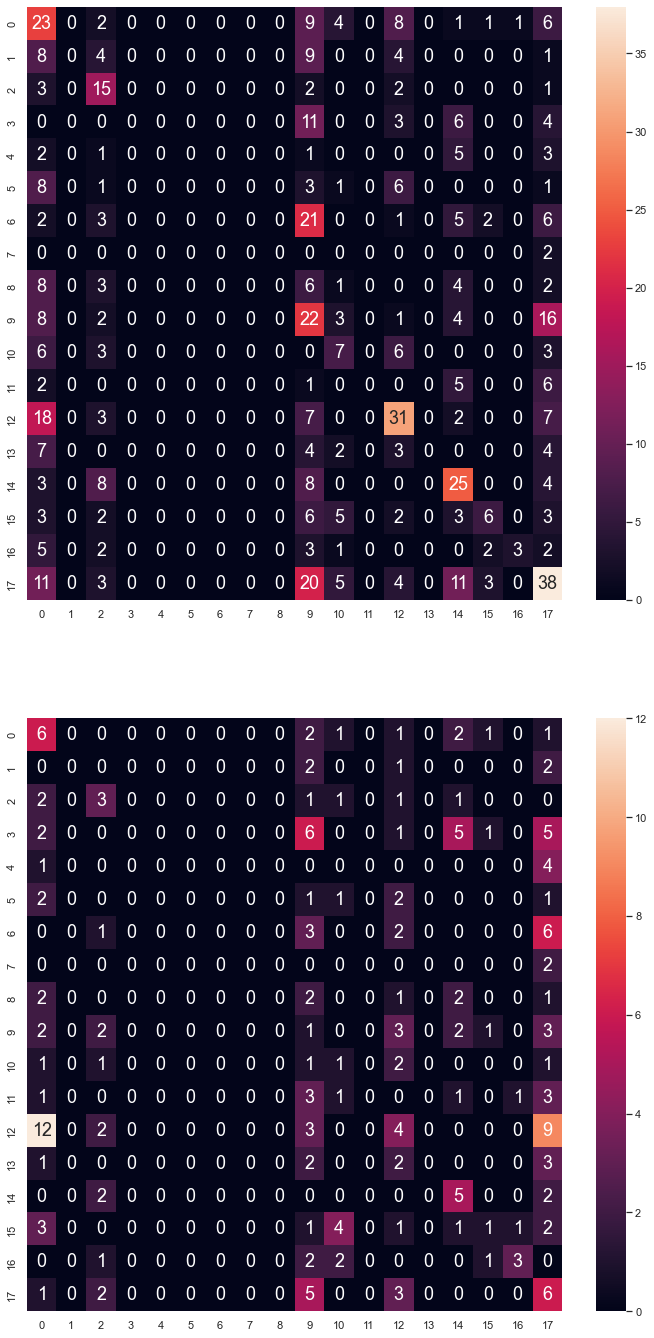

In [52]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Prediction of Type 1

Let's predict the value of **Type 1** for a few specific Pokemons -- *Mewtwo*, *Giratina* and *Butterfree* -- using the Classification Tree derived above.   

In [53]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Mewtwo", "GiratinaOrigin Forme", "Butterfree"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True


In [54]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Psychic', 'Dragon', 'Dragon'], dtype=object)

In [55]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Type 1"]], y_pred], axis = 1)

pkmndata_acc

,Name,Type 1,PredType
15,Butterfree,Bug,Psychic
162,Mewtwo,Psychic,Dragon
545,GiratinaOrigin Forme,Ghost,Dragon


#### Prediction of Class Probabilities

In case of any Classification Model, we should check the Class Probabilities along with the final Class Predictions.

In [56]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.017 0.    0.    0.102 0.085 0.    0.085 0.    0.068 0.068 0.    0.085
  0.034 0.    0.22  0.051 0.    0.186]
 [0.038 0.077 0.288 0.    0.019 0.019 0.058 0.    0.058 0.038 0.058 0.
  0.058 0.    0.154 0.038 0.038 0.058]
 [0.038 0.077 0.288 0.    0.019 0.019 0.058 0.    0.058 0.038 0.058 0.
  0.058 0.    0.154 0.038 0.038 0.058]]
